# Tutorial on Linear Regression #

Here we will implement a linear regression learning algorithm from scratch. The goal is to generate some noisy data to play around with and also explore what's really going on behind the scenes in a generic regression algorithm. After we have developed a working algorithm we will make use of some real data. We will use python and some helper libraries when necessary.

## What's the Point? ##
Linear regression is a simple but powerful method that you have likely performed sometime in your life whether you know it or not. Have you ever found a line that "fits" through a group of points? If so, then you have performed a pretty basic form of linear regression.

Another question -- if linear regression is mostly about fitting a line to data, why is it considered to be a learning algorithm? Let's start from the beginning and just attempt to guess how we might fit a line to some data.

Suppose we are given some data $x = (x_1,x_2,\cdots,x_n), \ y = (y_1,y_2,\cdots,y_n)$ and we are tasked with finding a continuous approximation of this discrete data set. In other words we are looking for a linear function $f(x) = \beta_0 + \beta_1 x$ such that $f(x)$ approximates the original data. How can we do this? 

Well as a first approach we might try and make an educated guess for what the slope, $\beta$, of the line $f(x)$ should be. To do so we find the expected value of the transformed data $\Delta y, \Delta x$, where $\Delta y = (y_2-y_1,\cdots, y_n-y_{n-1})$ and similarly for $x$. Symbolically we have 
$$\hat{\beta} = \frac{1}{n-1}\sum_{i=1}^n \Delta x_i \Delta y_i = \frac{1}{n-1}\Big((x_2-x_1)(y_2-y_1) + (x_3-x_2)(y_3-y_2) + \cdots + (x_n - x_{n-1})(y_n - y_{n-1})\Big)$$
which acts as an approximation of the theoretical slope of a line that's "close" to the original data.

Now that we have a guess for the slope to finish up we need to find the $y$-intercept for the function $f$. To do so we need to pick a candidate point for the line to pass through. One possible point to pick is "center-of-mass" point which is just the mean of the data points $x,y$ i.e. 
$$(\bar{x},\bar{y}) = \left(\frac{1}{n}\sum_{i=1}^n x_i, \frac{1}{n}\sum_{i=1}^n y_i\right).$$

Putting everything together we find that
$$\hat{\beta_0} = \bar{y} - \hat{\beta_1}\bar{x}$$

## Ordinary Least Squares Regression ##

But does this have anything to do with linear regression? The answer is yes, sort of. Linear regression gives a formal procedure for choosing the intercept and slope paramaters, $\beta_0, \beta_1$ respectively, so that we don't just go around trying to guess. 

The most common and simple procedure for linear regression is knows as ordinary least squares regression (OLSR). Under this method we attempt to minimize the sum of the squared errors of our data. Formally, suppose that we are given data $x = (x_1,x_2,\cdots,x_N), \ y = (y_1,y_2,\cdots,y_N)$ and we make the assumption that there is a linear relationship between $x$ and $y$, i.e. 
$$y_i = \beta_0 + \beta_1 x_i + \epsilon_i,$$
where $\beta_0, \beta_1$ are unknown parameters and $\epsilon_i$ is an unknown error term. Now as the name OLSR implies we want to minimize the sum of the square error terms $\epsilon_i^2$. Thus we create a function 
$$SSE(\beta_0,\beta_1) = \sum_{i=1}^N \epsilon_i^2 = \sum_{i=1}^N(y_i - \beta_0 -\beta_1 x_i)^2,$$ 
which is a function of $\beta_0, \beta_1$and our goal is to find the parameters $\hat{\beta_0},\hat{\beta_1}$ that minimize the $SSE$ function.

To find the minima of $SSE$ with respect to $\beta_0,\beta_1$ we use calculus:
$$\begin{align*}
\frac{\partial}{\partial \beta_0}SSE(\beta_0,\beta_1) 
&= \sum_{i=1}^N \frac{\partial}{\partial \beta_0}(y_i - \beta_0 - \beta_1 x_i)^2 = -2\sum_{i=1}^N(y_i - \beta_0 - \beta_1 x_i) \hspace{5cm} &(1)
\\
\frac{\partial}{\partial \beta_1}SSE(\beta_0,\beta_1) &= \sum_{i=1}^N \frac{\partial}{\partial \beta_0}(y_i - \beta_0 - \beta_1 x_i)^2 = -2\sum_{i=1}^N(x_i y_i - x_i\beta_0 - \beta_1 x_i^2) \hspace{5cm} &(2).
\end{align*}$$

Now we set both derivatives equal to 0 and do some solving! Setting (1) equal to zero yields
$$\begin{align*}
\frac{\partial}{\partial \beta_0}SSE(\beta_0,\beta_1) &= -2\sum_{i=1}^N(y_i - \beta_0 - \beta_1 x_i) =0 \\
&\Longrightarrow \sum_{i=1}^N y_i - \sum_{i=1}^N \beta_0 - \beta_1 \sum_{i=1}^N x_i = 0\\
&\Longrightarrow N\beta_0 = \sum_{i=1}^N y_i - \beta_1 \sum_{i=1}^N x_i \\
&\Longrightarrow \beta_0 = \frac{1}{N} \sum_{i=1}^N y_i - \beta_1 \frac{1}{N}\sum_{i=1}^N x_i \\
&\Longrightarrow \beta_0 = \bar{y} - \beta_1 \bar{x}. \hspace{10cm} (3)
\end{align*}$$

Setting (2) equal to zero and substituting (3) into (2) we get
$$\begin{align*}
\frac{\partial}{\partial \beta_1}SSE(\beta_0,\beta_1) &= -2\sum_{i=1}^N(x_i y_i - x_i\beta_0 - \beta_1 x_i^2) = 0 \\
&\Longrightarrow \sum_{i=1}^N x_i y_i - (\bar{y} - \beta_1 \bar{x}) \sum_{i=1}^N x_i - \beta_1 \sum_{i=1}^N x_i^2 = 0 \\
&\Longrightarrow \sum_{i=1}^N x_i y_i - \bar{y}\sum_{i=1}^N x_i - \beta_1\left(\bar{x}\sum_{i=1}^N x_i - \sum_{i=1}^N x_i^2\right) = 0 \\
&\Longrightarrow \beta_1 = \frac{\sum_{i=1}^N x_i y_i - \frac{1}{N}\sum_{i=1}^N x_i y_i}{\frac{1}{N}\sum_{i=1}^N x_i - \sum_{i=1}^N x_i^2} = \frac{Cov(X,Y)}{Var(X)}
\end{align*}$$

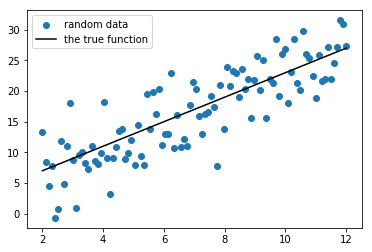

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import math
import pandas as pd

np.random.seed(2400)
noise = np.random.normal(0,4,100)

x = np.linspace(2,12,100)
data = 3 + 2*x + noise 
truth = 3 + 2*x

data_plot = plt.scatter(x, data)
truth_plot, = plt.plot(x,truth,'k')
plt.legend([data_plot, truth_plot],['random data','the true function'])
plt.show()

## Building the Model ##
### Splitting the Data##
So now that we have generated a 'noisy-line' we want to split the data set into two separate pieces: a training set and a testing set. But why should we even bother to split our data set? What's the point?

Well the point is that we are trying to build a **predictive** model. To that end we need to make predictions, and one way to make predictions is to split up our data set into a training set (which we will use to build the model) and a testing set (which we will use to see how well our model predicts the data). 

In most statistical software packages there are built in functions for splitting your data and there are several different methodologies used to implement the split. These methods have to do with what is called resampling, which is a large topic of its own and we will omit a thorough description here. 

Instead we will write our own routine to split the data, just to get a feel for what actually needs to be implemented to create a linear regression algorithm from scratch.

In [2]:
def split(data, ratio):
    data = np.array(data)
    num = int(math.floor(len(data)*ratio))
    
    indices = range(len(data))
    
    train_ind = set(np.random.choice(indices, num, replace=False))
    test_ind = set(indices) - train_ind
    
    train = np.take(data, list(train_ind))
    test = np.take(data, list(test_ind))
    
    train_ind = list(np.take(x, list(train_ind)))
    test_ind = list(np.take(x, list(test_ind)))
    
    return train, train_ind, test, test_ind

train, train_ind, test, test_ind = split(data, 0.5)


Now that we have split the data, all we need to do is make use of the formulas that we have previously derived to estimate the parameters $\beta_0, \beta_1$. 

In [3]:
x_bar = np.mean(train_ind)
y_bar = np.mean(train)

var_x = 0
cov_xy = 0
for i,j in zip(train_ind, train):
    var_x += (i-x_bar)**2
    cov_xy += (i-x_bar)*(j-y_bar)
    
beta1 = cov_xy / var_x
beta0 = y_bar - beta1*x_bar

beta0, beta1

(3.1092415425975393, 1.9733960465276621)

As we can see the parameters are very close to the true values, which  

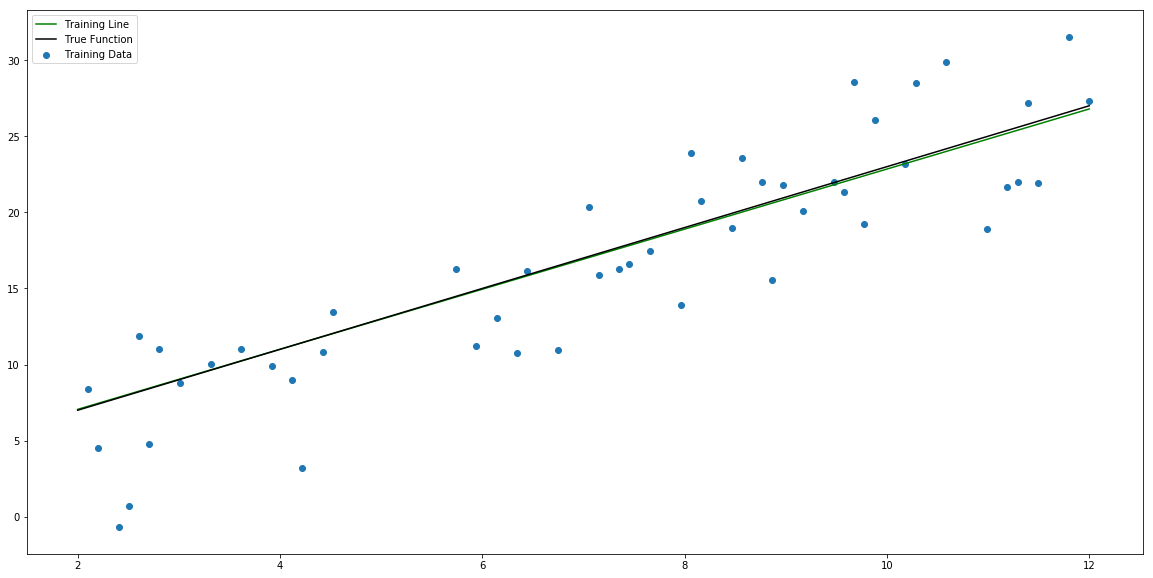

In [4]:
train_line = beta0 + beta1*x

plt.figure(figsize=(20,10))
train_plot, = plt.plot(x, train_line, 'g', label='1')
plt.plot(x,truth, 'k'),
tester_plot = plt.scatter(test_ind, test, label='4')
plt.legend([train_plot, truth_plot, tester_plot],['Training Line','True Function', 'Training Data'])
plt.show()


In [5]:
def f(x):
    return beta0 + beta1*x

pred_val = f(np.array(test_ind))
RSS = sum((pred_val - test)**2)
RSE = np.sqrt(RSS*(1/18.))
TSS = sum((test-y_bar)**2)
1 - RSS/TSS


0.77544612685281156